In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

import pickle

from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
df = pd.read_csv("..\result\dataset.csv", index_col="Unnamed: 0")
df.index = pd.to_datetime(df.index)
df.head()

In [ ]:
df.tail()

,Ahu1_inv,Ahu2_inv,Ahu3_inv,Ahu4_inv,Ahu5_inv,Ahu6_inv,Ahu7_inv,Ahu8_inv,Ahu9_inv,Ahu10_inv,Ahu11_inv,Ahu12_inv,Ahu13_inv,Ahu14_inv,Chiller1_inv,Plant1_air,Plant1_monoxide,Plant1_dioxide,Plant1_pm2d5,Plant1_pm10,Plant1_temperature,Plant1_humidity,Plant2_air,Plant2_monoxide,Plant2_dioxide,Plant2_pm2d5,Plant2_pm10,Plant2_temperature,Plant2_humidity,Plant3_air,Plant3_monoxide,Plant3_dioxide,Plant3_pm2d5,Plant3_pm10,Plant3_temperature,Plant3_humidity,Plant4_air,Plant4_monoxide,Plant4_dioxide,Plant4_pm2d5,Plant4_pm10,Plant4_temperature,Plant4_humidity,Plant5_air,Plant5_monoxide,Plant5_dioxide,Plant5_pm2d5,Plant5_pm10,Plant5_temperature,Plant5_humidity,Plant6_air,Plant6_monoxide,Plant6_dioxide,Plant6_pm2d5,Plant6_pm10,Plant6_temperature,Plant6_humidity,Plant7_air,Plant7_monoxide,Plant7_dioxide,Plant7_pm2d5,Plant7_pm10,Plant7_temperature,Plant7_humidity,Plant8_air,Plant8_monoxide,Plant8_dioxide,Plant8_pm2d5,Plant8_pm10,Plant8_temperature,Plant8_humidity,Plant9_air,Plant9_monoxide,Plant9_dioxide,Plant9_pm2d5,Plant9_pm10,Plant9_temperature,Plant9_humidity,Plant10_air,Plant10_monoxide,Plant10_dioxide,Plant10_pm2d5,Plant10_pm10,Plant10_temperature,Plant10_humidity
2023-08-01 15:20:00,40.0,40.0,40.0,40.0,40.0,45.0,35.0,36.0,36.0,40.0,45.0,45.0,45.0,45.0,41.0,0.0,1.0,689.0,8.0,9.0,23.85,48.32,0.0,0.0,624.0,4.0,4.0,26.23,40.04,0.0,0.0,623.0,5.0,5.0,26.72,39.38,0.0,0.0,590.0,4.0,4.0,26.40,39.98,0.0,0.0,563.0,5.0,5.0,26.31,41.03,0.0,1.0,563.0,6.0,6.0,26.59,41.54,0.0,0.0,579.0,5.0,5.0,26.58,38.66,0.0,0.0,557.0,5.0,5.0,27.16,40.84,0.0,0.0,513.0,2.0,2.0,31.45,54.25,0.0,0.0,553.0,6.0,7.0,31.32,54.64
2023-08-01 15:30:00,40.0,40.0,40.0,40.0,40.0,45.0,35.0,36.0,36.0,40.0,45.0,45.0,45.0,45.0,41.0,0.0,1.0,692.0,6.0,6.0,23.85,48.21,0.0,0.0,640.0,4.0,4.0,26.08,40.41,0.0,0.0,660.0,6.0,6.0,26.61,40.28,0.0,0.0,593.0,4.0,4.0,26.45,39.81,0.0,0.0,557.0,5.0,5.0,26.32,40.84,0.0,2.0,564.0,5.0,5.0,26.57,41.28,0.0,0.0,571.0,4.0,4.0,26.63,38.08,0.0,1.0,567.0,5.0,5.0,27.03,41.46,0.0,1.0,504.0,5.0,5.0,31.45,54.15,0.0,2.0,534.0,6.0,6.0,31.23,54.74
2023-08-01 15:40:00,40.0,40.0,40.0,40.0,40.0,45.0,35.0,36.0,36.0,40.0,45.0,45.0,45.0,45.0,41.0,0.0,1.0,694.0,5.0,5.0,23.76,48.31,0.0,0.0,635.0,4.0,4.0,26.16,40.58,0.0,0.0,639.0,5.0,5.0,26.55,39.72,0.0,0.0,601.0,5.0,5.0,26.45,39.81,0.0,0.0,567.0,4.0,4.0,26.27,40.87,0.0,1.0,565.0,5.0,5.0,26.55,41.33,0.0,0.0,577.0,4.0,4.0,26.56,38.16,0.0,1.0,567.0,5.0,5.0,26.93,41.04,0.0,0.0,521.0,4.0,4.0,31.35,54.55,0.0,0.0,557.0,6.0,6.0,31.29,54.61
2023-08-01 15:50:00,40.0,40.0,40.0,40.0,40.0,45.0,35.0,36.0,36.0,40.0,45.0,45.0,45.0,45.0,41.0,0.0,1.0,705.0,6.0,6.0,23.71,47.84,0.0,0.0,650.0,5.0,6.0,26.12,40.38,0.0,0.0,628.0,4.0,4.0,26.57,39.52,0.0,0.0,599.0,4.0,4.0,26.40,39.92,0.0,0.0,559.0,4.0,4.0,26.27,40.96,0.0,1.0,573.0,5.0,5.0,26.54,41.35,0.0,0.0,581.0,4.0,4.0,26.55,38.16,0.0,1.0,570.0,4.0,4.0,26.85,41.61,0.0,0.0,504.0,4.0,4.0,31.35,54.71,0.0,2.0,544.0,5.0,5.0,31.15,55.20
2023-08-01 16:00:00,40.0,40.0,40.0,40.0,40.0,45.0,35.0,40.0,40.0,40.0,45.0,45.0,45.0,45.0,41.0,0.0,1.0,717.0,6.0,6.0,23.74,49.35,0.0,0.0,660.0,4.0,4.0,26.19,40.17,0.0,0.0,627.0,5.0,5.0,26.64,39.70,0.0,0.0,587.0,3.0,3.0,26.58,39.61,0.0,1.0,557.0,4.0,4.0,26.31,40.88,0.0,1.0,573.0,5.0,5.0,26.49,41.37,0.0,0.0,589.0,5.0,5.0,26.52,38.46,0.0,0.0,573.0,5.0,5.0,26.89,41.59,49.0,0.0,518.0,4.0,4.0,31.49,54.42,0.0,0.0,563.0,5.0,5.0,31.47,54.40


In [ ]:
len(df.columns)

85

In [ ]:
data = [df[[i]] for i in df.columns]
name = df.columns.tolist()

stat_data = []
stat_name = []
# non-stationary
nstat_data = []
nstat_name = []
diff1_data = []
diff1_name = []
diff2_data = []
diff2_name = []

# print(len(data),len(name))

for index,var in enumerate(data):
# ADF 검정 수행
    result = kpss(var.dropna())
    adf_statistic = result[0]
    p_value = result[1]

    # print(f'ADF 통계량: {adf_statistic}')
    # print(f'p-value: {p_value}')

    if p_value <= 0.05:
        print(f'KPSS 검정결과 {name[index]} 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.')

        # log = np.log1p(var)
        # log_first = pd.Series(var).diff().dropna()
        log_first = np.log1p(var.dropna()).diff().dropna()

        result = kpss(log_first)
        adf_statistic = result[0]
        p_value = result[1]

        # print(f'>> ADF 통계량: {adf_statistic}')
        # print(f'>> p-value: {p_value}')

        if p_value <= 0.05:
            print(f'>> KPSS 검정결과 1차분한 {name[index]} 시계열 데이터가 정상성을 가지지 않습니다.')

            log_second = np.log1p(var).diff().diff().dropna()

            result = kpss(log_second)
            adf_statistic = result[0]
            p_value = result[1]

            # print(f'>>>> ADF 통계량: {adf_statistic}')
            # print(f'>>>> p-value: {p_value}')

            if p_value <=0.05:
                print(f'>>>> KPSS 검정결과 2차분한 {name[index]} 시계열 데이터가 정상성을 가지지 않습니다.')
                nstat_data.append(var)
                nstat_name.append(name[index])

            else:
                print(f'>>>> KPSS 검정결과 2차분한 {name[index]} 시계열 데이터가 정상성을 가집니다.')
                diff2_data.append(var)
                diff2_name.append(name[index])

        else:
            print(f'>>>> KPSS 검정결과 1차분한 {name[index]} 시계열 데이터가 정상성을 가집니다.')
            diff1_data.append(var)
            diff1_name.append(name[index])

    else:
        print(f'ADF 검정결과 {name[index]} 시계열 데이터가 정상성을 가집니다.')
        stat_data.append(var)
        stat_name.append(name[index])


    print()

print("정상성 :", stat_name)
print("1차분결과 정상성: ", diff1_name)
print("2차분결과 정상성: ", diff2_name)
print('정상성 안띰 :', nstat_name)

KPSS 검정결과 Ahu1_inv 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 Ahu1_inv 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 Ahu2_inv 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 Ahu2_inv 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 Ahu3_inv 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 Ahu3_inv 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 Ahu4_inv 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 Ahu4_inv 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 Ahu5_inv 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 Ahu5_inv 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 Ahu6_inv 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 Ahu6_inv 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 Ahu7_inv 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 Ahu7_inv 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 Ahu8_inv 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 Ahu8_inv 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 Ahu9_inv 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한 Ahu9_inv 시계열 데이터가 정상성을 가집니다.

KPSS 검정결과 Ahu10_inv 시계열 데이터가 정상성을 가지지 않으므로 차분을 계산합니다.
>>>> KPSS 검정결과 1차분한

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', None)  # 모든 행을 보이게 설정
pd.set_option('display.max_columns', None)  # 모든 열을 보이게 설정
pd.set_option('display.width', None)  # 셀의 너비를 최대로 설정
pd.set_option('display.max_colwidth', None)  # 열의 최대 너비를 제한 없애기

kpss_result = pd.DataFrame()
kpss_index = df.columns
kpss_result.index = kpss_index
kpss_result['정상성'] = ['O' if i in stat_name else "X" for i in kpss_index]
kpss_result['1차분 정상성'] = ['O' if i in diff1_name else "X" for i in kpss_index]
kpss_result['2차분 정상성'] = ['O' if i in diff2_name else "X" for i in kpss_index]
kpss_result['정상성 안띰'] = ['O' if i in nstat_name else "X" for i in kpss_index]
kpss_result

def replace_after_o(row):
    o_found = False
    for i in range(len(row)):
        if row[i] == 'O':
            o_found = True
        elif o_found and row[i] == 'X':
            row[i] = '-'
    return row

# Apply the function to each row of the dataframe
kpss_result = kpss_result.apply(replace_after_o, axis=1)
kpss_result

,정상성,1차분 정상성,2차분 정상성,정상성 안띰
Ahu1_inv,X,O,-,-
Ahu2_inv,X,O,-,-
Ahu3_inv,X,O,-,-
Ahu4_inv,X,O,-,-
Ahu5_inv,X,O,-,-
Ahu6_inv,X,O,-,-
Ahu7_inv,X,O,-,-
Ahu8_inv,X,O,-,-
Ahu9_inv,X,O,-,-
Ahu10_inv,X,O,-,-


In [ ]:
print("정상성 :", stat_name)
print("1차분결과 정상성: ", diff1_name)

정상성 : ['Plant2_air', 'Plant3_air', 'Plant3_dioxide', 'Plant4_air', 'Plant4_dioxide', 'Plant5_air', 'Plant6_dioxide', 'Plant6_humidity', 'Plant7_air']
1차분결과 정상성:  ['Ahu1_inv', 'Ahu2_inv', 'Ahu3_inv', 'Ahu4_inv', 'Ahu5_inv', 'Ahu6_inv', 'Ahu7_inv', 'Ahu8_inv', 'Ahu9_inv', 'Ahu10_inv', 'Ahu11_inv', 'Ahu12_inv', 'Ahu13_inv', 'Ahu14_inv', 'Chiller1_inv', 'Plant1_air', 'Plant1_monoxide', 'Plant1_dioxide', 'Plant1_pm2d5', 'Plant1_pm10', 'Plant1_temperature', 'Plant1_humidity', 'Plant2_monoxide', 'Plant2_dioxide', 'Plant2_pm2d5', 'Plant2_pm10', 'Plant2_temperature', 'Plant2_humidity', 'Plant3_monoxide', 'Plant3_pm2d5', 'Plant3_pm10', 'Plant3_temperature', 'Plant3_humidity', 'Plant4_monoxide', 'Plant4_pm2d5', 'Plant4_pm10', 'Plant4_temperature', 'Plant4_humidity', 'Plant5_monoxide', 'Plant5_dioxide', 'Plant5_pm2d5', 'Plant5_pm10', 'Plant5_temperature', 'Plant5_humidity', 'Plant6_air', 'Plant6_monoxide', 'Plant6_pm2d5', 'Plant6_pm10', 'Plant6_temperature', 'Plant7_monoxide', 'Plant7_dioxide', 'P

In [ ]:
temp = df[[f'Plant{i}_temperature' for i in range(1,11)]]
temp.head()

,Plant1_temperature,Plant2_temperature,Plant3_temperature,Plant4_temperature,Plant5_temperature,Plant6_temperature,Plant7_temperature,Plant8_temperature,Plant9_temperature,Plant10_temperature
2023-01-31 10:00:00,27.26,25.84,26.13,26.04,25.81,26.22,25.86,26.84,24.43,24.88
2023-01-31 10:10:00,26.48,25.88,25.96,25.96,25.64,26.15,25.79,26.84,24.77,25.26
2023-01-31 10:20:00,26.39,25.75,25.80,25.77,25.45,26.02,25.60,26.74,25.06,25.57
2023-01-31 10:30:00,25.87,25.63,25.72,25.60,25.27,25.89,25.46,26.65,25.35,25.72
2023-01-31 10:40:00,25.43,25.63,25.66,25.53,25.24,25.90,25.34,26.58,25.66,26.01


In [ ]:
max_lag = 8

y = temp[[temp.columns[1]]]
stat_dct = {}
stat_name = stat_name
stat_data = [df[[stat_name[i]]] for i in range(len(stat_name))]
print(len(stat_data))
print('정상성을 띄는 factor 개수 : ',len(stat_data))#, len(stat_name))
print('---------------------------------------------------------------------')
for j in range(len(stat_data)):
    test = pd.concat([stat_data[j],np.log1p(y).diff()], axis=1).dropna()
    stat_dct[stat_name[j]] = []
    try:
      result = grangercausalitytests(test,maxlag= max_lag,verbose=False) # lag 8
      print(stat_name[j])
      k=0
      for i in range(1,max_lag+1):
          # ssr F test & chi2 test , likelihood ratio test , parameter F test => 4개중 3개이상 유의수준보다 작으면 인과관계 있다고 판단.
          if sum([result[i][0]['ssr_ftest'][1]<0.05, result[i][0]['ssr_chi2test'][1]<0.05, result[i][0]['lrtest'][1]<0.05, result[i][0]['params_ftest'][1]<0.05])>=4:
              k+=1
      if k==max_lag:
          print(f'{j}는 인과성이 있다.')
          stat_dct[stat_name[j]].append(i)
      print()
    except: pass
print('---------------------------------------------------------------------')
stat_dct

9
정상성을 띄는 factor 개수 :  9
---------------------------------------------------------------------
Plant2_air

Plant3_air

Plant3_dioxide
2는 인과성이 있다.

Plant4_air
3는 인과성이 있다.

Plant4_dioxide
4는 인과성이 있다.

Plant5_air
5는 인과성이 있다.

Plant6_dioxide
6는 인과성이 있다.

Plant6_humidity

Plant7_air
8는 인과성이 있다.

---------------------------------------------------------------------


{'Plant2_air': [],
 'Plant3_air': [],
 'Plant3_dioxide': [8],
 'Plant4_air': [8],
 'Plant4_dioxide': [8],
 'Plant5_air': [8],
 'Plant6_dioxide': [8],
 'Plant6_humidity': [],
 'Plant7_air': [8]}

In [ ]:
result[i][0]

{'ssr_ftest': (1.2982023925892665, 0.23905328625575667, 25990.0, 8),
 'ssr_chi2test': (10.392412350617638, 0.23855635370468783, 8),
 'lrtest': (10.390336496653617, 0.2386907806287271, 8),
 'params_ftest': (1.2982023925969743, 0.23905328625210398, 25990.0, 8.0)}

In [ ]:
max_lag = 8

diff1_dct = {}
diff1_data = [df[[diff1_name[i]]] for i in range(len(diff1_name))]
diff1_name = diff1_name

print('2차분 후 정상성을 띄는 factor 개수 : ',len(diff1_data))#, len(diff2_name))
print('---------------------------------------------------------------------')
for j in range(len(diff1_data)):
    test = pd.concat([diff1_data[j].diff().diff(),np.log1p(y).diff()], axis=1).dropna()
    diff1_dct[diff1_name[j]] = []
    try:
      result = grangercausalitytests(test,maxlag= max_lag,verbose=False) # lag 8
      print(diff1_name[j])
      k=0
      for i in range(1,max_lag+1):
          # ssr F test & chi2 test , likelihood ratio test , parameter F test => 4개중 3개이상 유의수준보다 작으면 인과관계 있다고 판단.
          if sum([result[i][0]['ssr_ftest'][1]<0.05, result[i][0]['ssr_chi2test'][1]<0.05, result[i][0]['lrtest'][1]<0.05, result[i][0]['params_ftest'][1]<0.05])>=4:
          # if sum([result[i][0]['ssr_ftest'][1]<0.05, result[i][0]['ssr_chi2test'][1]<0.05]) >=3 :
              k+=1
      if k==max_lag:
          print(f'{j}는 인과성이 있다.')
          diff1_dct[diff1_name[j]].append(i)
      print()
    except: pass
print('---------------------------------------------------------------------')
diff1_dct

2차분 후 정상성을 띄는 factor 개수 :  76
---------------------------------------------------------------------
Ahu1_inv
0는 인과성이 있다.

Ahu2_inv

Ahu3_inv

Ahu4_inv
3는 인과성이 있다.

Ahu5_inv

Ahu6_inv

Ahu7_inv

Ahu8_inv
7는 인과성이 있다.

Ahu9_inv
8는 인과성이 있다.

Ahu10_inv

Ahu11_inv

Ahu12_inv
11는 인과성이 있다.

Ahu13_inv

Ahu14_inv
13는 인과성이 있다.

Chiller1_inv

Plant1_air

Plant1_monoxide

Plant1_dioxide
17는 인과성이 있다.

Plant1_pm2d5

Plant1_pm10

Plant1_temperature
20는 인과성이 있다.

Plant1_humidity
21는 인과성이 있다.

Plant2_monoxide

Plant2_dioxide
23는 인과성이 있다.

Plant2_pm2d5

Plant2_pm10

Plant2_temperature
26는 인과성이 있다.

Plant2_humidity
27는 인과성이 있다.

Plant3_monoxide

Plant3_pm2d5

Plant3_pm10

Plant3_temperature
31는 인과성이 있다.

Plant3_humidity
32는 인과성이 있다.

Plant4_monoxide

Plant4_pm2d5

Plant4_pm10

Plant4_temperature
36는 인과성이 있다.

Plant4_humidity
37는 인과성이 있다.

Plant5_monoxide

Plant5_dioxide

Plant5_pm2d5

Plant5_pm10

Plant5_temperature
42는 인과성이 있다.

Plant5_humidity

Plant6_air

Plant6_monoxide

Plant6_pm2d5

Plant6_pm10

Pla

{'Ahu1_inv': [8],
 'Ahu2_inv': [],
 'Ahu3_inv': [],
 'Ahu4_inv': [8],
 'Ahu5_inv': [],
 'Ahu6_inv': [],
 'Ahu7_inv': [],
 'Ahu8_inv': [8],
 'Ahu9_inv': [8],
 'Ahu10_inv': [],
 'Ahu11_inv': [],
 'Ahu12_inv': [8],
 'Ahu13_inv': [],
 'Ahu14_inv': [8],
 'Chiller1_inv': [],
 'Plant1_air': [],
 'Plant1_monoxide': [],
 'Plant1_dioxide': [8],
 'Plant1_pm2d5': [],
 'Plant1_pm10': [],
 'Plant1_temperature': [8],
 'Plant1_humidity': [8],
 'Plant2_monoxide': [],
 'Plant2_dioxide': [8],
 'Plant2_pm2d5': [],
 'Plant2_pm10': [],
 'Plant2_temperature': [8],
 'Plant2_humidity': [8],
 'Plant3_monoxide': [],
 'Plant3_pm2d5': [],
 'Plant3_pm10': [],
 'Plant3_temperature': [8],
 'Plant3_humidity': [8],
 'Plant4_monoxide': [],
 'Plant4_pm2d5': [],
 'Plant4_pm10': [],
 'Plant4_temperature': [8],
 'Plant4_humidity': [8],
 'Plant5_monoxide': [],
 'Plant5_dioxide': [],
 'Plant5_pm2d5': [],
 'Plant5_pm10': [],
 'Plant5_temperature': [8],
 'Plant5_humidity': [],
 'Plant6_air': [],
 'Plant6_monoxide': [],
 'Plant6

In [ ]:
causality_dct = {**stat_dct, **diff1_dct}
filtered_caus = [k for k, v in causality_dct.items() if v]
print(len(filtered_caus))
filtered_caus

29


['Plant3_dioxide',
 'Plant4_air',
 'Plant4_dioxide',
 'Plant5_air',
 'Plant6_dioxide',
 'Plant7_air',
 'Ahu1_inv',
 'Ahu4_inv',
 'Ahu8_inv',
 'Ahu9_inv',
 'Ahu12_inv',
 'Ahu14_inv',
 'Plant1_dioxide',
 'Plant1_temperature',
 'Plant1_humidity',
 'Plant2_dioxide',
 'Plant2_temperature',
 'Plant2_humidity',
 'Plant3_temperature',
 'Plant3_humidity',
 'Plant4_temperature',
 'Plant4_humidity',
 'Plant5_temperature',
 'Plant6_temperature',
 'Plant7_dioxide',
 'Plant7_temperature',
 'Plant7_humidity',
 'Plant8_dioxide',
 'Plant8_temperature']

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation.
    Shifted data filled with NaNs

    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    wrap : NaN 채우는 것. shift 하면서 사라진 값으로 다시 채우기. 값이 순환되게 된다. wrap=False 이면 NaN은 drop하고 correlation 구한다.
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))

In [ ]:
select_name = filtered_caus
select_data = [df[[filtered_caus[i]]] for i in range(len(filtered_caus))]

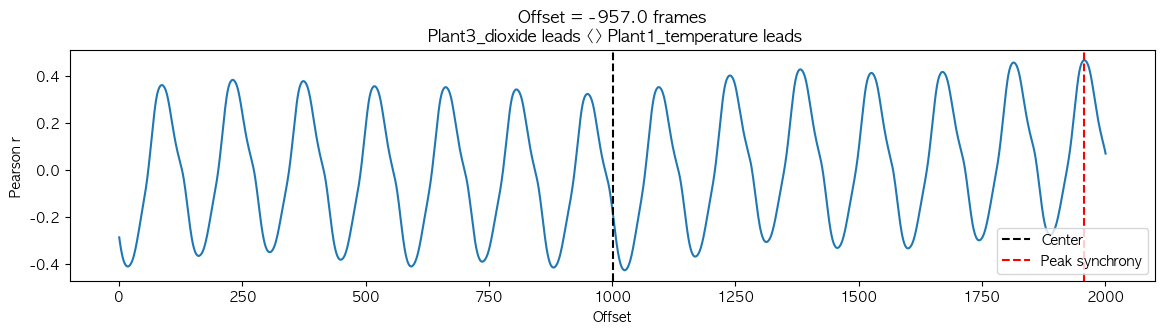

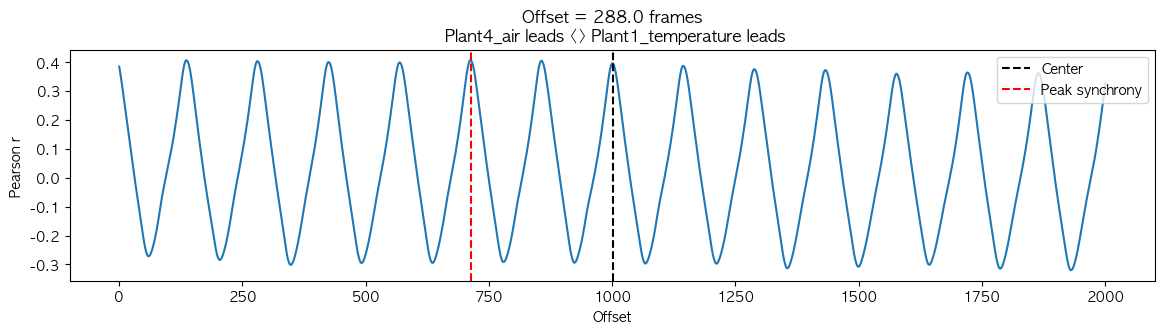

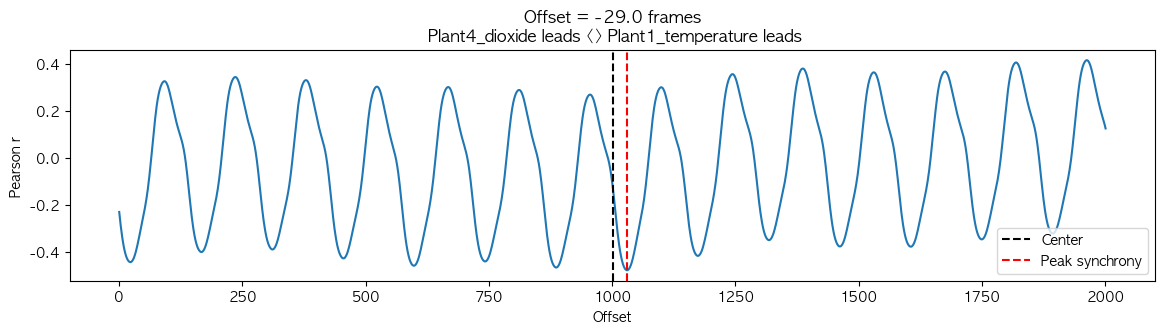

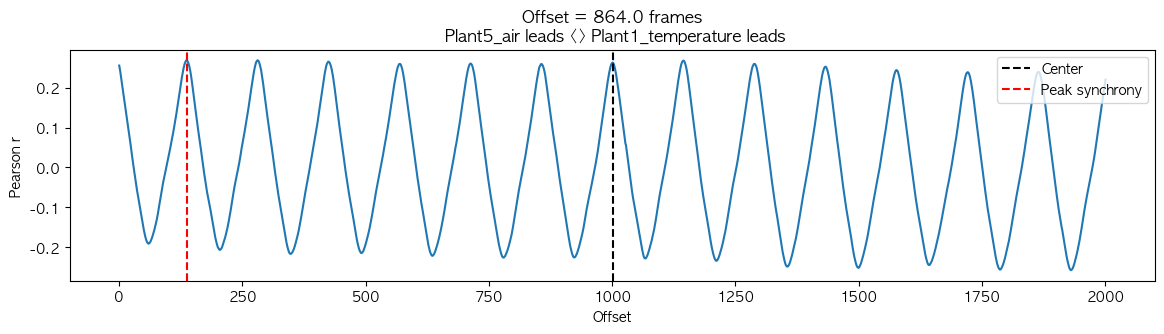

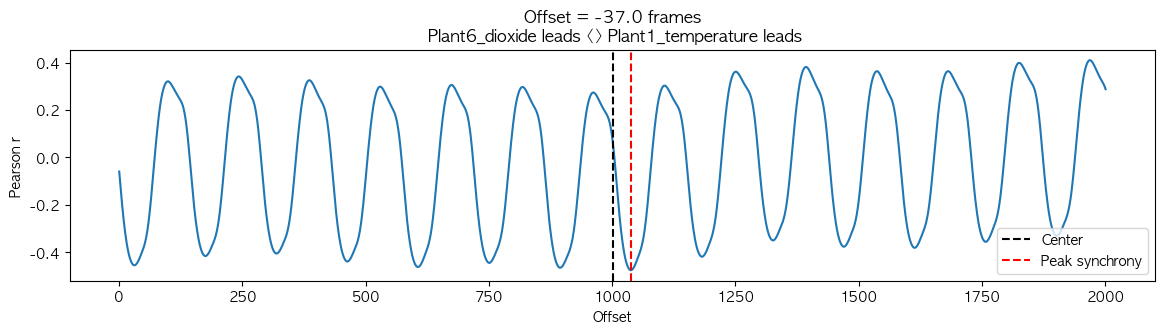

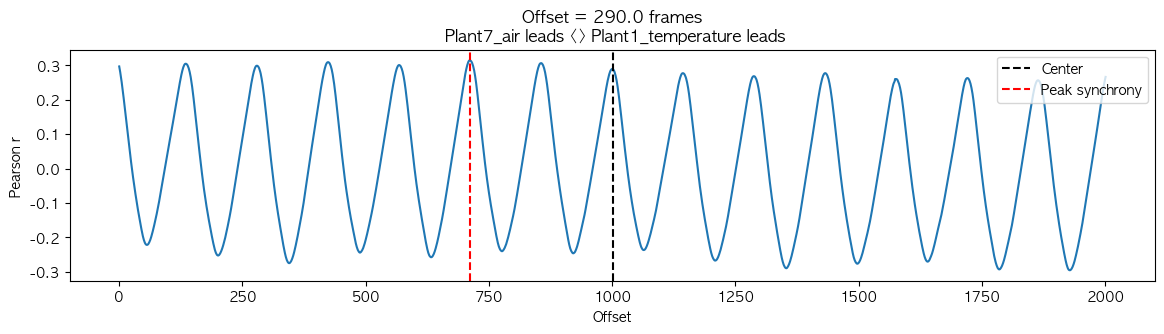

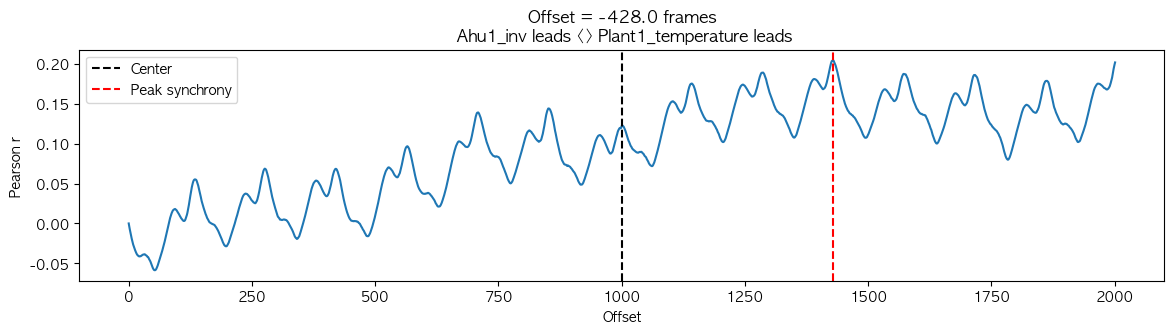

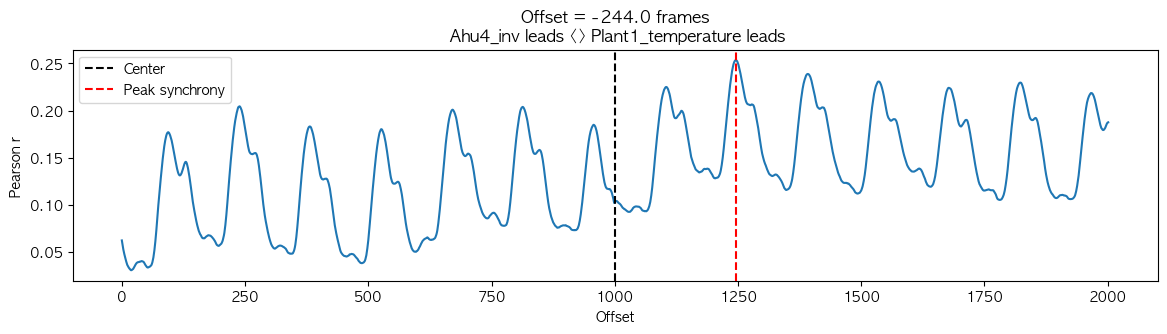

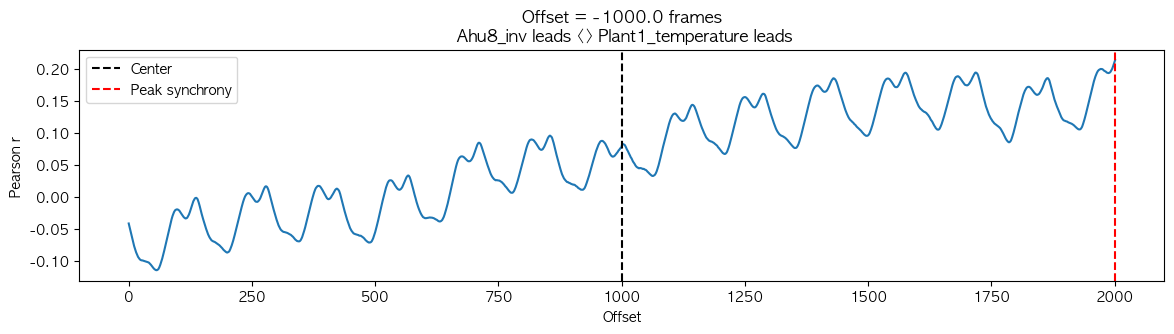

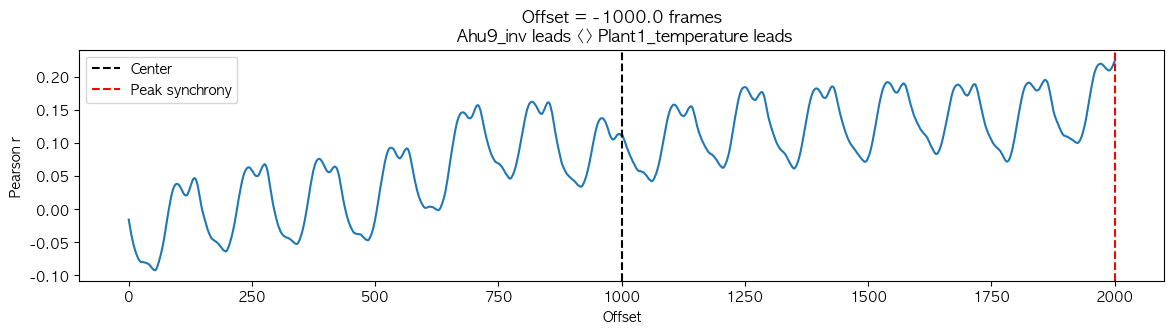

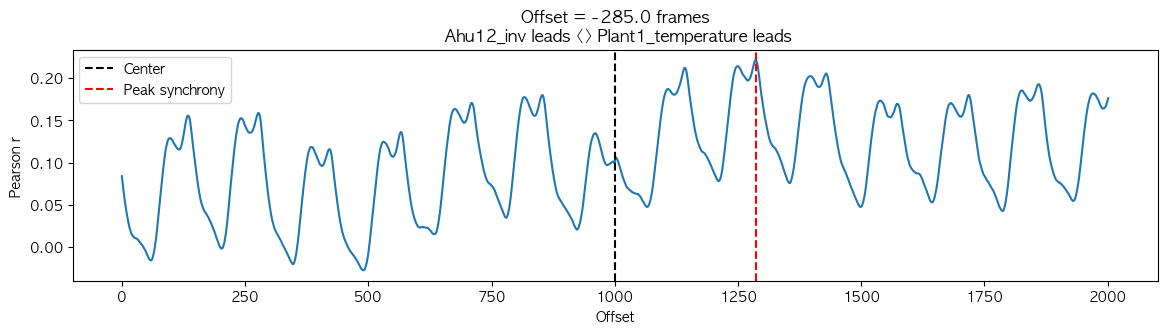

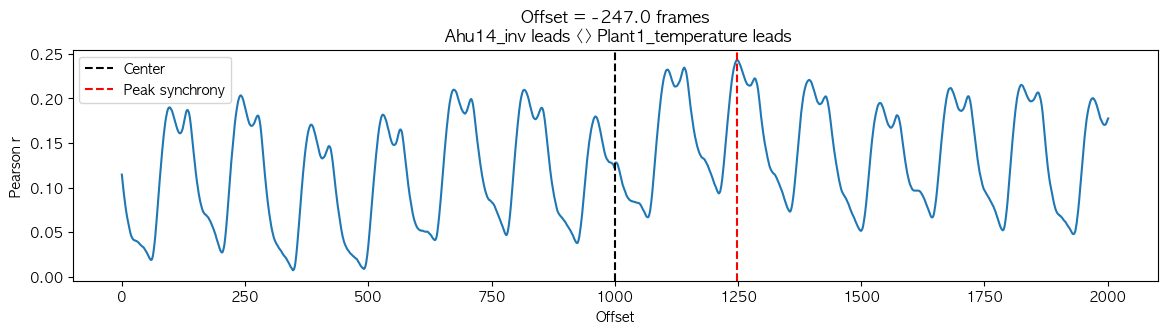

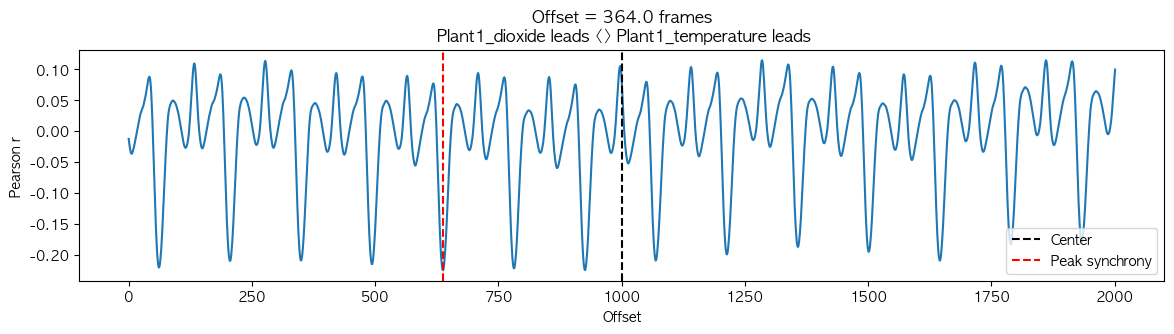

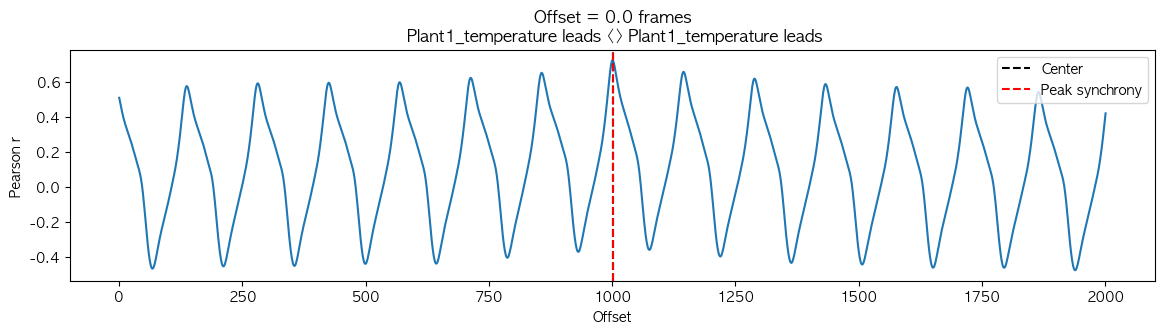

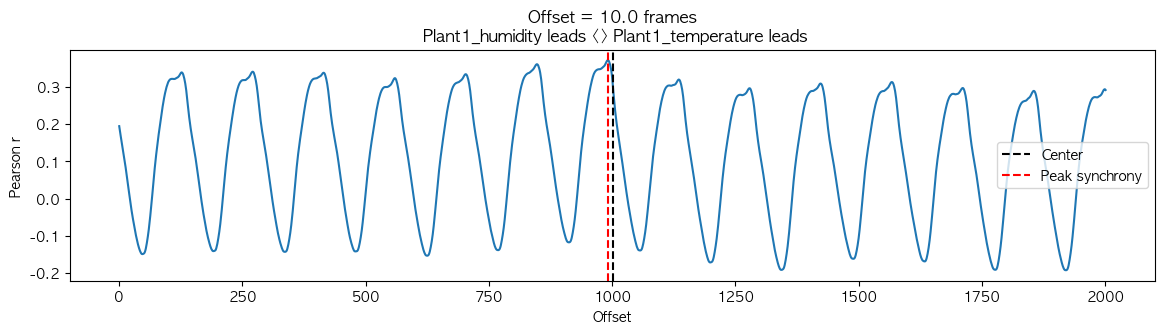

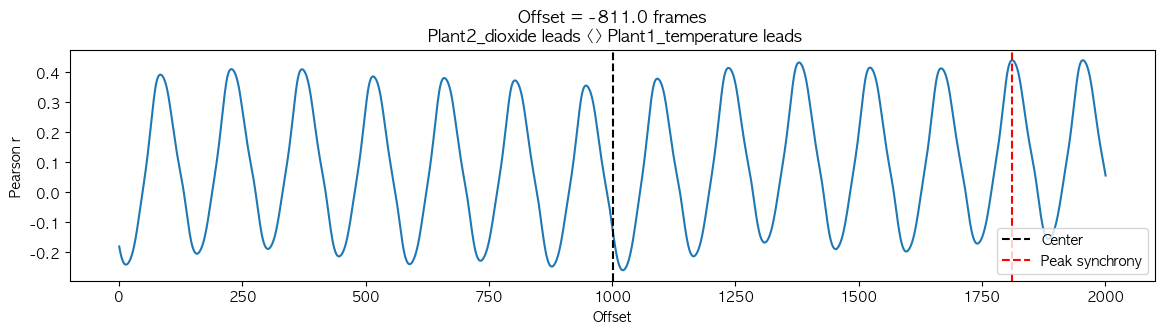

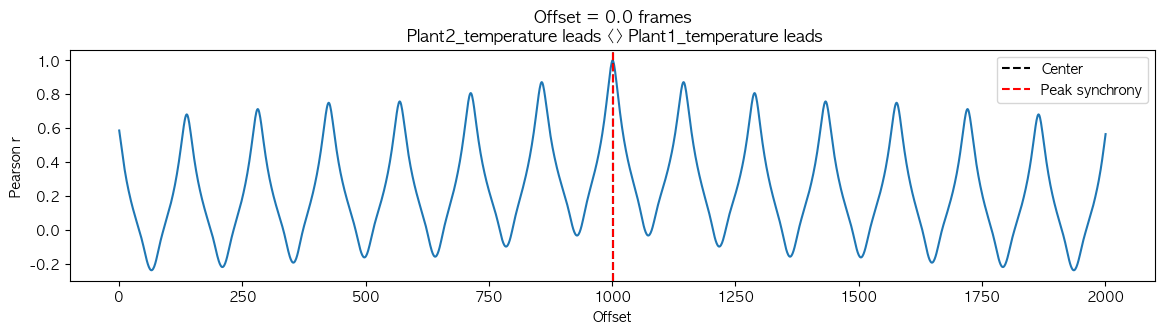

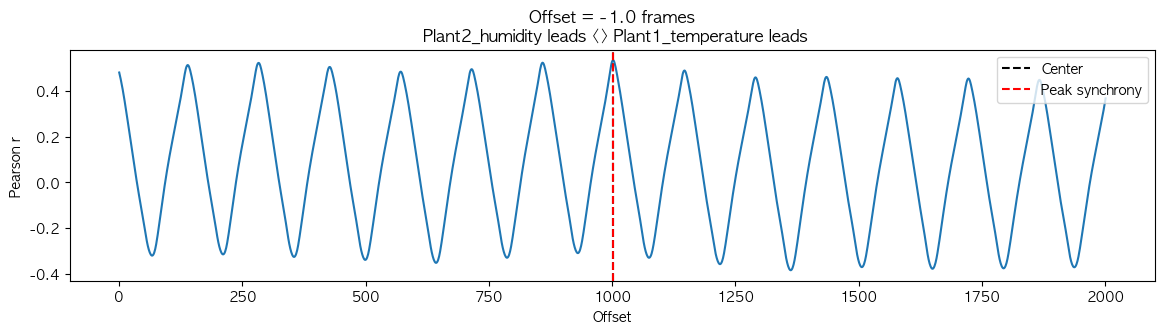

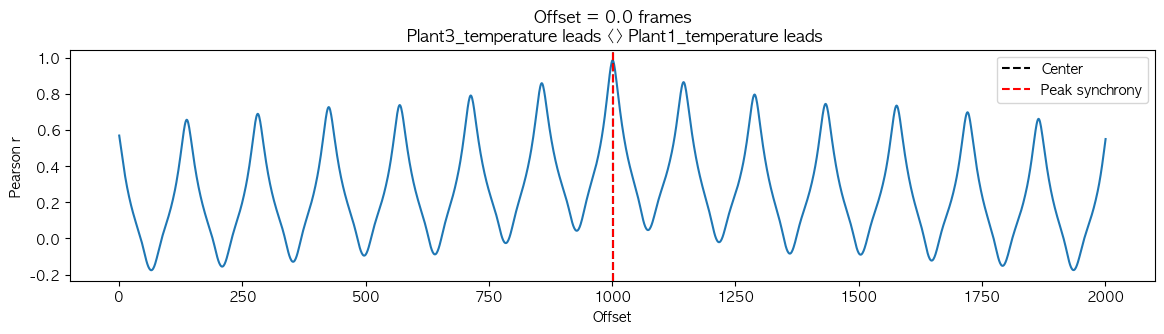

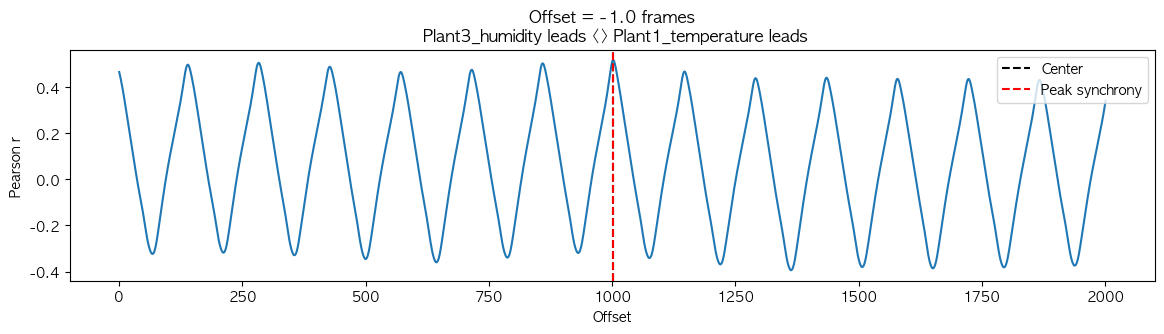

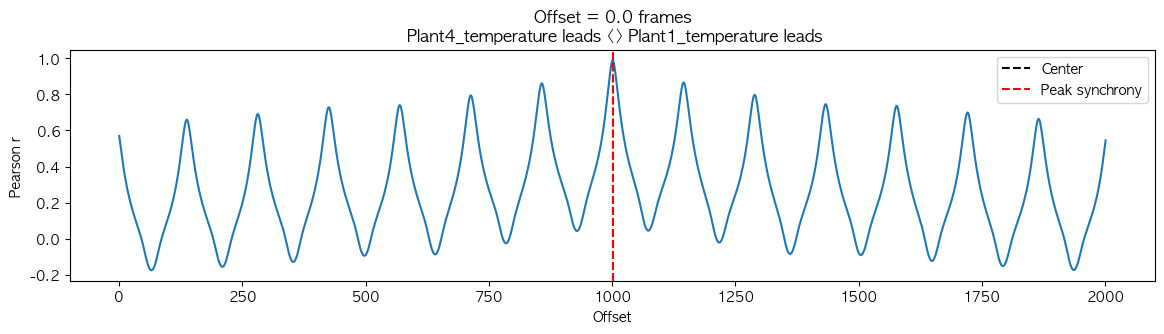

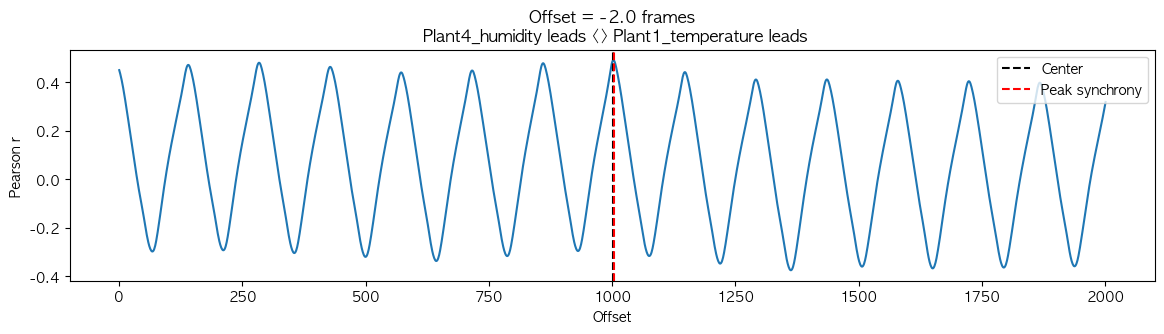

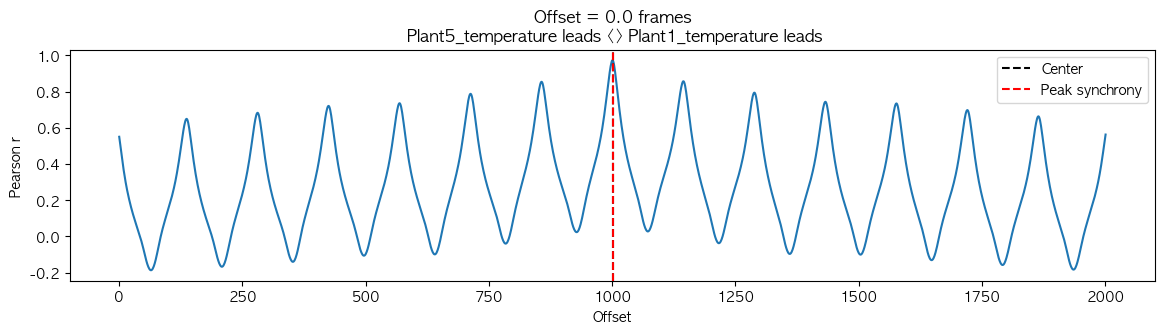

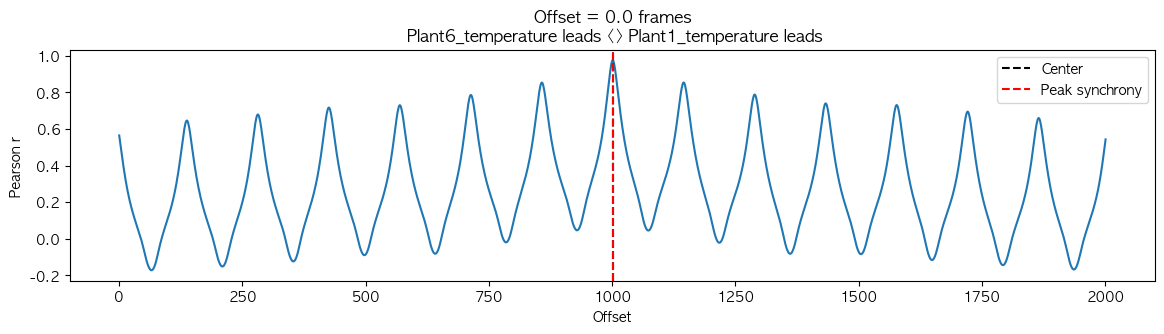

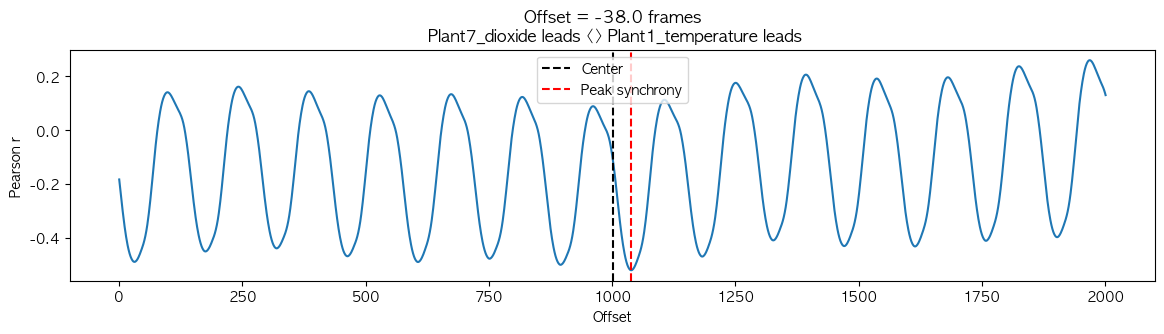

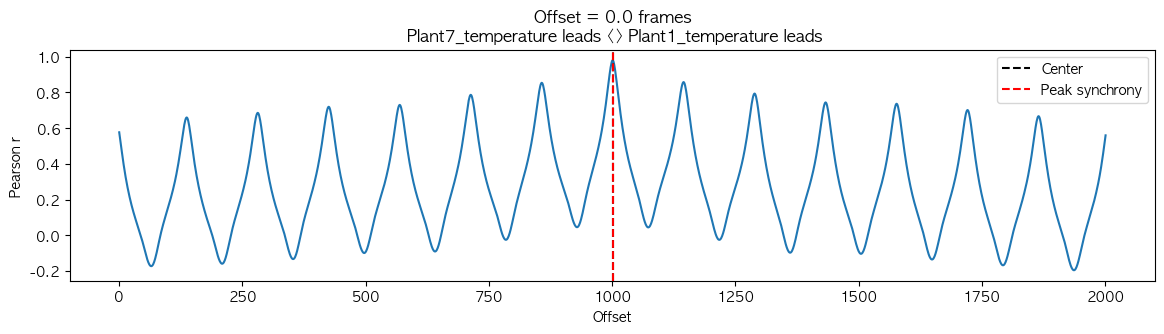

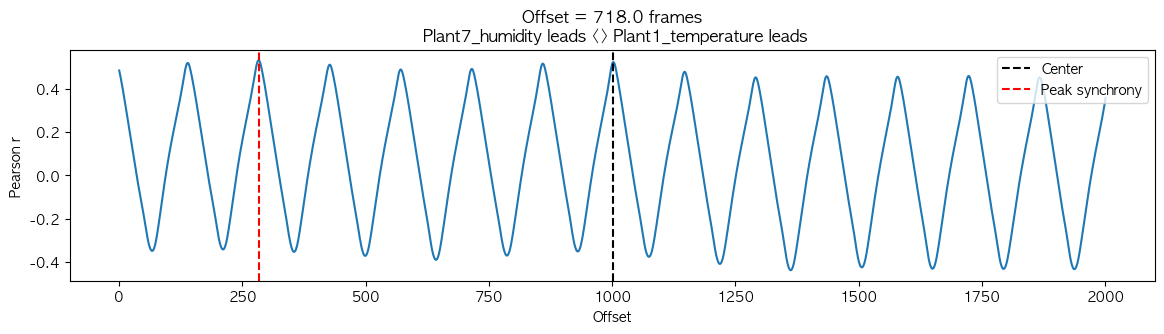

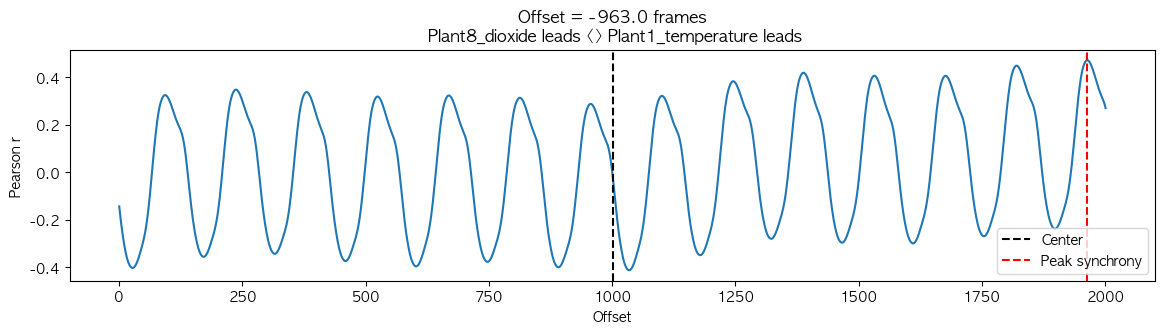

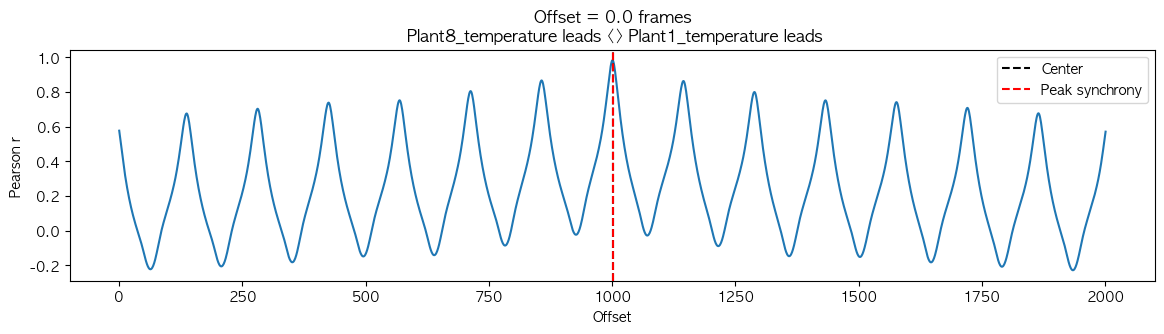

In [ ]:
final_selection = {}
threshold = 0.5

for i in range(len(select_data)):
    lags = 1000
    try:
      rs = [crosscorr(select_data[i][select_data[i].columns[0]],y[y.columns[0]], lag) for lag in range(-lags-1,lags+1)]
    except:
      rs = [crosscorr(select_data[i],y[y.columns[0]], lag) for lag in range(-lags-1,lags+1)]
    offset = np.floor(len(rs)/2)-np.argmax(np.abs(rs)) # 최대 correlation 값 가지는 offset 계산 >> 절댓값
    if max(np.abs(rs)) >= threshold:
        final_selection[select_name[i]] = max(np.abs(rs))
    f,ax=plt.subplots(figsize=(14,3))
    ax.plot(rs)
    ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
    ax.axvline(np.argmax(np.abs(rs)),color='r',linestyle='--',label='Peak synchrony')
    ax.set(title=f'Offset = {offset} frames\n {select_name[i]} leads <> Plant1_temperature leads', xlabel='Offset',ylabel='Pearson r')
    # ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
    # ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
    plt.legend()

In [ ]:
final_selection

{'Plant1_temperature': 0.7249344216278801,
 'Plant2_temperature': 0.9999999999999999,
 'Plant2_humidity': 0.5339175481186202,
 'Plant3_temperature': 0.9876272730755393,
 'Plant3_humidity': 0.5177097581754634,
 'Plant4_temperature': 0.9891502458777925,
 'Plant5_temperature': 0.9738158576817892,
 'Plant6_temperature': 0.975613392969354,
 'Plant7_dioxide': 0.5205266766788834,
 'Plant7_temperature': 0.9808019550513658,
 'Plant7_humidity': 0.5304984496717713,
 'Plant8_temperature': 0.9829598383688851}

In [ ]:
len(final_selection)

12